# K means clustering

In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale 
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

## Load and explore the data

In [2]:
digits = load_digits()
print(dir(digits))
print(type(digits.data))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'numpy.ndarray'>


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
print(digits.data[0].reshape(8,-1))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


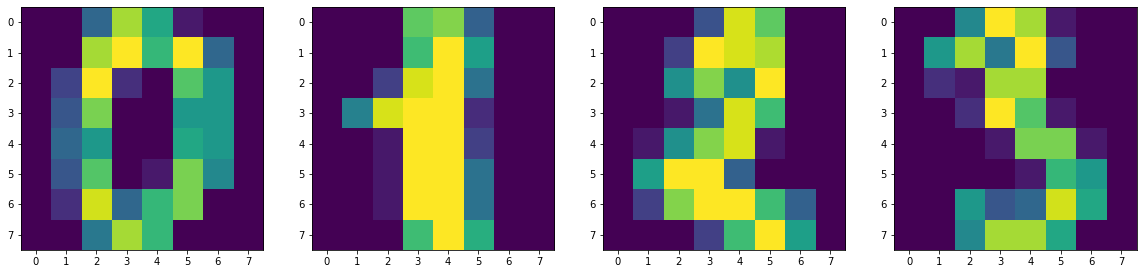

In [6]:
fig, axes = plt.subplots(1,4, figsize=(20,8))
for k in range(4):
    axes[k].imshow(digits.data[k].reshape(8,-1), interpolation='nearest')

In [7]:
print(len(digits.data))

1797


In [8]:
print(type(digits.images))

<class 'numpy.ndarray'>


In [9]:
print(digits.images.shape)

(1797, 8, 8)


In [10]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Parece que `images` es igual que `data` pero *reshaped*.

## Scale the data

This is done to parse the attribute values to a \[-1,+1\] scale.  
The idea is to improve the calculation time.

In [11]:
data = scale(digits.data)
print(type(data))

<class 'numpy.ndarray'>


In [12]:
print(data[0])

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]


OK, IT SEEMS OFF BECAUSE IT ISN'T IN THE \[-1,+1\] RANGE.  

[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) states:  
Standardize a dataset along any axis.  
Center to the mean and component wise scale to unit variance.

Also:  
**Warning** Risk of data leak  
Do not use scale unless you know what you are doing. 
A common mistake is to apply it to the entire data before splitting into training and test sets. 
This will bias the model evaluation because information would have leaked from the test set to the training set. 
In general, we recommend using StandardScaler within a Pipeline in order to prevent most risks of data leaking: 
pipe = make_pipeline(StandardScaler(), LogisticRegression()).

In this case we don't split our data because this is *unsupervised* learning, so I think we're ok with that.

In [13]:
print(data[0].reshape(8,8))

[[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
  -0.40972392 -0.12502292]
 [-0.05907756 -0.62400926  0.4829745   0.75962245 -0.05842586  1.12772113
   0.87958306 -0.13043338]
 [-0.04462507  0.11144272  0.89588044 -0.86066632 -1.14964846  0.51547187
   1.90596347 -0.11422184]
 [-0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
   1.54181413 -0.04723238]
 [ 0.          0.76465553  0.05263019 -1.44763006 -1.73666443  0.04361588
   1.43955804  0.        ]
 [-0.06134367  0.8105536   0.63011714 -1.12245711 -1.06623158  0.66096475
   0.81845076 -0.08874162]
 [-0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
  -0.75743581 -0.20978513]
 [-0.02359646 -0.29908135  0.08671869  0.20829258 -0.36677122 -1.14664746
  -0.5056698  -0.19600752]]


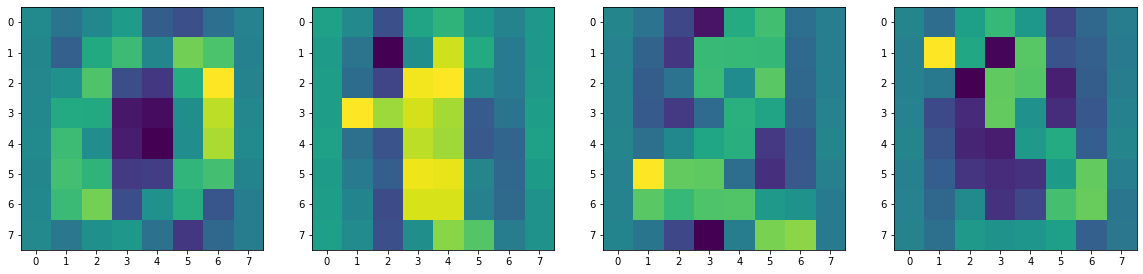

In [14]:
fig, axes = plt.subplots(1,4, figsize=(20,8))
for k in range(4):
    axes[k].imshow(data[k].reshape(8,-1), interpolation='nearest')

## Set number of clusters (K)

In [15]:
# See the targets in the loaded data
print(type(digits.target))

<class 'numpy.ndarray'>


In [16]:
print(digits.target.shape)

(1797,)


In [17]:
print(digits.target[0:30],'...')

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9] ...


In [18]:
k = len(np.unique(digits.target))
# k = 10 would be the same
print(k)

10


In [19]:
samples, features = data.shape
print(samples, features)

1797 64


In [20]:
# Set a variable for the targets
y = digits.target

## Create the model

In [21]:
# function from sklearn (although it seems that since the tutorial the function is improved in the sklearn website)
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [22]:
# classifier object
clf = KMeans(
    n_clusters=k, # the number of clusters
    init="k-means++", # default is random, this is equispaced (I guess)
    n_init = 10, # number of time to run with different initial centroids (then picks best)
)

In [23]:
# Now test it with the bench_k_means function:
bench_k_means(clf, "1", data)

1        	69514	0.599	0.646	0.622	0.469	0.618	0.145


Those are accuracy scores for: homogeneity, completeness, v_measure, adjusted_rand, adjusted_mutual and silhouette

The meaning is explained in the [Clustering Evaluation section in sklearn website](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

Note that the model was already fitted within the `bench_k_means` function.

## Plotting

View [sklearn documentation for plotting](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html).

### Principal component analysis (PCA).

We can't plot over our original 64 dimensions.  
PCA allows to project into a 2-dimensional space and plot the data and the clusters in this new space.

In [24]:
reduced_data = PCA(n_components=2).fit_transform(data)

In [25]:
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(reduced_data)

KMeans(n_clusters=10)

In [26]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [27]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

([], [])

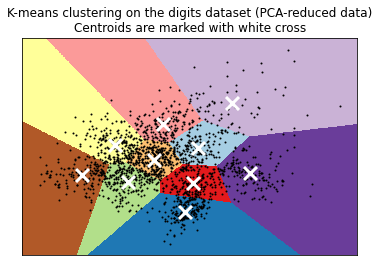

In [28]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())